In [560]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pavlofesenko/titanic-extended")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\90586\.cache\kagglehub\datasets\pavlofesenko\titanic-extended\versions\2


In [561]:
import pandas as pd
import numpy as np
import seaborn 
import matplotlib.pyplot as plt


In [562]:
path = "./dataset/full.csv"
data = pd.read_csv(path)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,...,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,...,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,...,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,...,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0


In [563]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

In [564]:
pandas.isnull(data).sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

In [565]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1304.000000,1302.000000,1304.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,658.534509,29.415829,2.291411
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,380.377373,13.758954,0.840852
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,326.750000,21.000000,1.750000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,661.500000,28.000000,3.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,987.250000,37.750000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.000000


array([[<Axes: title={'center': 'Age'}>]], dtype=object)

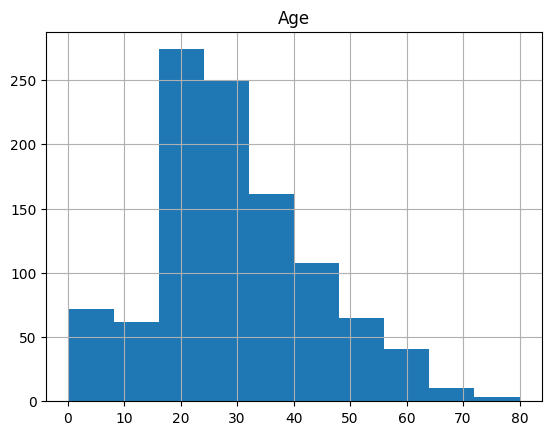

In [566]:
age = pandas.DataFrame(data['Age'])
age.hist()

array([[<Axes: title={'center': 'Age_wiki'}>]], dtype=object)

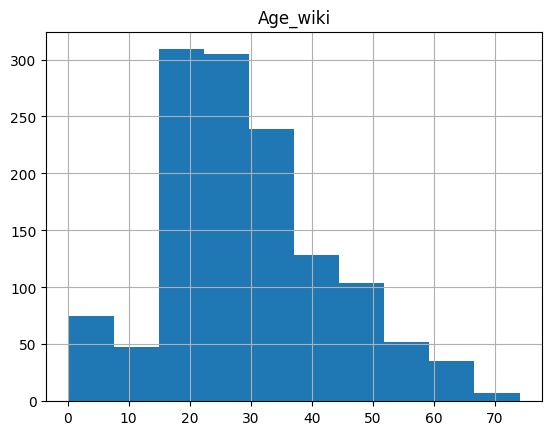

In [567]:
age_wiki = pandas.DataFrame(data['Age_wiki'])
age_wiki.hist()

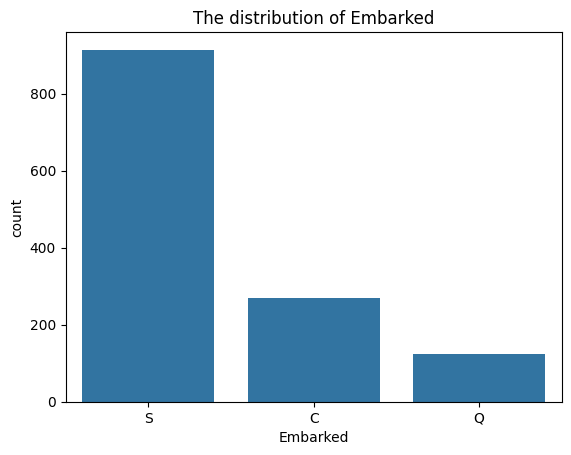

In [568]:
embark = pandas.DataFrame(data['Embarked'])
seaborn.countplot(data = embark, x = 'Embarked')
plt.title("The distribution of Embarked")
plt.show()

<Axes: >

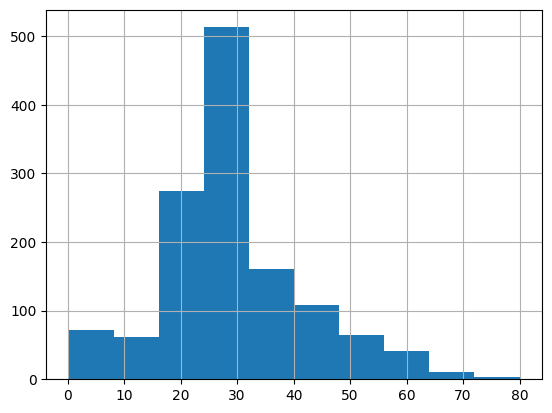

In [569]:
age_mean = data['Age'].mean(skipna=True)
data['Age'] = data['Age'].fillna(age_mean)
data['Age'].hist()


<Axes: >

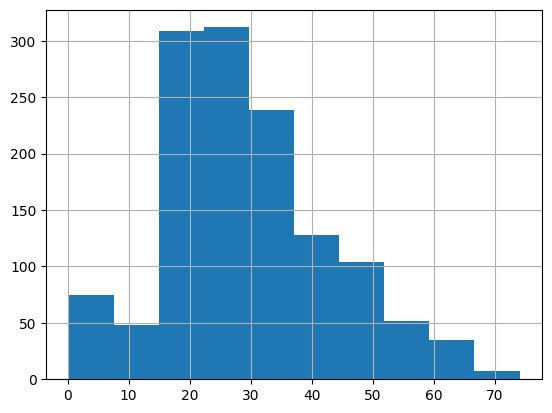

In [570]:
age_wiki_mean = data['Age_wiki'].mean(skipna=True)
data['Age_wiki'] = data['Age_wiki'].fillna(age_wiki_mean)
data['Age_wiki'].hist()

In [571]:
data.drop("Age", axis=1, inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,NaN,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,C105,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,0,0,359309,8.0500,NaN,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0


In [572]:
data.rename(columns={'Age_wiki': 'Age'}, inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,NaN,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,C105,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,0,0,359309,8.0500,NaN,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0


# Explanation
Here we choose to keep the age_wiki as the age because of there exists too much nan in the age column, and filling mean into nan will be a bad choice.


In [573]:
data['Family'] = data['SibSp'] + data['Parch']

In [574]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,WikiId,Name_wiki,Age,Hometown,Boarded,Destination,Lifeboat,Body,Class,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,...,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,...,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,...,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,...,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0,1
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,...,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0,0
5,6,0.0,3,"Moran, Mr. James",male,0,0,330877,8.4583,NaN,...,785.0,"Doherty, Mr. William John (aka ""James Moran"")",22.0,"Cork, Ireland",Queenstown,New York City,NaN,NaN,3.0,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,E46,...,200.0,"McCarthy, Mr. Timothy J.",54.0,"Dorchester, Massachusetts, US",Southampton,"Dorchester, Massachusetts, US",NaN,175MB,1.0,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,NaN,...,1108.0,"Pålsson, Master Gösta Leonard",2.0,"Bjuv, Skåne, Sweden",Southampton,"Chicago, Illinois, US",NaN,NaN,3.0,4
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,11.1333,NaN,...,902.0,"Johnson, Mrs. Elisabeth Vilhelmina (née Berg)",26.0,"St. Charles, Illinois, US",Southampton,"St. Charles, Illinois, US",15,NaN,3.0,2
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,30.0708,NaN,...,520.0,"Nassr Allah, Mrs. Adal (née Akim)[62][77]",14.0,"Zahlé, Lebanon, Ottoman Empire",Cherbourg,"Cleveland, Ohio, US",?,NaN,2.0,1


In [575]:
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age               0
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
Family            0
dtype: int64

In [576]:
data[data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,WikiId,Name_wiki,Age,Hometown,Boarded,Destination,Lifeboat,Body,Class,Family
61,62,1.0,1,"Icard, Miss. Amelie",female,0,0,113572,80.0,B28,...,284.0,"and maid, Miss Amelie ""Amelia"" Icard",38.0,"New York, New York, US",Southampton,"New York, New York, US",6,NaN,1.0,0
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,0,0,113572,80.0,B28,...,283.0,"Stone, Mrs. Martha Evelyn (née Stevens)",62.0,"New York, New York, US",Southampton,"New York, New York, US",6,NaN,1.0,0


In [577]:
data[data['Boarded'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,WikiId,Name_wiki,Age,Hometown,Boarded,Destination,Lifeboat,Body,Class,Family
347,348,1.0,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,1,0,386525,16.1000,NaN,...,NaN,NaN,29.415829,NaN,NaN,NaN,NaN,NaN,NaN,1
557,558,0.0,1,"Robbins, Mr. Victor",male,0,0,PC 17757,227.5250,NaN,...,NaN,NaN,29.415829,NaN,NaN,NaN,NaN,NaN,NaN,0
1041,1042,NaN,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,0,1,11767,83.1583,C54,...,NaN,NaN,29.415829,NaN,NaN,NaN,NaN,NaN,NaN,1
1048,1049,NaN,3,"Lundin, Miss. Olga Elida",female,0,0,347469,7.8542,NaN,...,NaN,NaN,29.415829,NaN,NaN,NaN,NaN,NaN,NaN,0
1228,1229,NaN,3,"Elias, Mr. Joseph",male,0,2,2675,7.2292,NaN,...,NaN,NaN,29.415829,NaN,NaN,NaN,NaN,NaN,NaN,2


In [578]:
data['Boarded'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', 'Belfast', nan],
      dtype=object)

In [579]:
def replace(full):
    if pd.isna(full):
        return full 
    if full == 'Southampton':
        return 'S'
    if full == 'Cherbourg':
        return 'C'
    if full == 'Queenstown':
        return 'Q'
    if full == 'Belfast':
        return 'B'
data['Boarded'] = data['Boarded'].map(lambda x: replace(x))

In [580]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,WikiId,Name_wiki,Age,Hometown,Boarded,Destination,Lifeboat,Body,Class,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,...,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",S,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,...,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",C,"New York, New York, US",4,NaN,1.0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,...,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",S,New York City,14?,NaN,3.0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,...,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",S,"Scituate, Massachusetts, US",D,NaN,1.0,1
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,...,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",S,New York City,NaN,NaN,3.0,0
5,6,0.0,3,"Moran, Mr. James",male,0,0,330877,8.4583,NaN,...,785.0,"Doherty, Mr. William John (aka ""James Moran"")",22.0,"Cork, Ireland",Q,New York City,NaN,NaN,3.0,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,E46,...,200.0,"McCarthy, Mr. Timothy J.",54.0,"Dorchester, Massachusetts, US",S,"Dorchester, Massachusetts, US",NaN,175MB,1.0,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,NaN,...,1108.0,"Pålsson, Master Gösta Leonard",2.0,"Bjuv, Skåne, Sweden",S,"Chicago, Illinois, US",NaN,NaN,3.0,4
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,11.1333,NaN,...,902.0,"Johnson, Mrs. Elisabeth Vilhelmina (née Berg)",26.0,"St. Charles, Illinois, US",S,"St. Charles, Illinois, US",15,NaN,3.0,2
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,30.0708,NaN,...,520.0,"Nassr Allah, Mrs. Adal (née Akim)[62][77]",14.0,"Zahlé, Lebanon, Ottoman Empire",C,"Cleveland, Ohio, US",?,NaN,2.0,1


In [581]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [582]:
data['Boarded'].count()

np.int64(1304)

In [583]:
data['Embarked_place_uncertain'] = data['Embarked'] != data['Boarded']

In [584]:
data.rename(columns={'Boarded': 'Embarked_wiki'}, inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,Name_wiki,Age,Hometown,Embarked_wiki,Destination,Lifeboat,Body,Class,Family,Embarked_place_uncertain
0,1,0.0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,...,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",S,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0,1,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,...,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",C,"New York, New York, US",4,NaN,1.0,1,False
2,3,1.0,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,...,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",S,New York City,14?,NaN,3.0,0,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,...,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",S,"Scituate, Massachusetts, US",D,NaN,1.0,1,False
4,5,0.0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,...,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",S,New York City,NaN,NaN,3.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,NaN,...,"Spector, Mr. Woolf",23.0,"London, England",S,New York City,NaN,NaN,3.0,0,False
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,C105,...,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",C,"New York, New York, US",8,NaN,1.0,0,False
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",S,US,NaN,32MB,3.0,0,False
1307,1308,NaN,3,"Ware, Mr. Frederick",male,0,0,359309,8.0500,NaN,...,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",S,New York City,NaN,NaN,3.0,0,False


# Attention
Here we should treat Embarked as real embarking place, according to my survey.

In [585]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassengerId               1309 non-null   int64  
 1   Survived                  891 non-null    float64
 2   Pclass                    1309 non-null   int64  
 3   Name                      1309 non-null   object 
 4   Sex                       1309 non-null   object 
 5   SibSp                     1309 non-null   int64  
 6   Parch                     1309 non-null   int64  
 7   Ticket                    1309 non-null   object 
 8   Fare                      1308 non-null   float64
 9   Cabin                     295 non-null    object 
 10  Embarked                  1307 non-null   object 
 11  WikiId                    1304 non-null   float64
 12  Name_wiki                 1304 non-null   object 
 13  Age                       1309 non-null   float64
 14  Hometown

In [586]:
data['Country'] = data['Hometown'].map(lambda x: str(x).split(',')[-1].strip() if isinstance(x, str) else '')

In [587]:
data['Region'] = data['Country']

In [588]:
data[data['Country'] == 'Russian Empire[note 6]']

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,Hometown,Embarked_wiki,Destination,Lifeboat,Body,Class,Family,Embarked_place_uncertain,Country,Region
342,343,0.0,2,"Collander, Mr. Erik Gustaf",male,0,0,248740,13.0,NaN,...,"Helsinki, Finland, Russian Empire[note 6]",S,"Ashtabula, Ohio, US",NaN,NaN,2.0,0,False,Russian Empire[note 6],Russian Empire[note 6]
417,418,1.0,2,"Silven, Miss. Lyyli Karoliina",female,0,2,250652,13.0,NaN,...,"Tornio, Finland, Russian Empire[note 6]",S,"Minneapolis, Minnesota, US",16,NaN,2.0,2,False,Russian Empire[note 6],Russian Empire[note 6]
747,748,1.0,2,"Sinkkonen, Miss. Anna",female,0,0,250648,13.0,NaN,...,"Turku, Finland, Russian Empire[note 6]",S,"Brighton, Boston, Massachusetts, US",10,NaN,2.0,0,False,Russian Empire[note 6],Russian Empire[note 6]
1129,1130,NaN,2,"Hiltunen, Miss. Marta",female,1,1,250650,13.0,NaN,...,"Joensuu, Finland, Russian Empire[note 6]",S,"Detroit, Michigan, US",NaN,NaN,2.0,2,False,Russian Empire[note 6],Russian Empire[note 6]


In [589]:
country_region_map = {
    'Russian Empire[note 6]': {'Country': 'Russian Empire', 'Region': 'Finland'},
    'Lithuania [76]': {'Country': 'Russian Empire', 'Region': 'Lithuania'},
    'Russia (Estonia?)': {'Country': 'Russian Empire', 'Region': 'Estonia'},
    'Finland': {'Country': 'Russian Empire', 'Region': 'Finland'},

    'New York City': {'Country': 'US', 'Region': 'New York City'},

    'North Somerset England': {'Country': 'UK', 'Region': 'England'},
    'England': {'Country': 'UK', 'Region': 'England'},
    'Ireland': {'Country': 'UK', 'Region': 'Ireland'},
    'British India': {'Country': 'UK', 'Region': 'British India'},
    'Ireland[note 1]': {'Country': 'UK', 'Region': 'Ireland'},
    'South Africa': {'Country': 'UK', 'Region': 'South Africa'},
    'UK[note 1]': {'Country': 'UK', 'Region': 'Ireland'},
    'UK[note 3]': {'Country': 'UK', 'Region': 'British India'},
    'UK[note 4]': {'Country': 'UK', 'Region': 'South Africa'},
    'UK': {'Country': 'UK', 'Region': 'England'},
    'British India[note 3]': {'Country': 'UK', 'Region': 'British India'},
    'Wales': {'Country': 'UK', 'Region': 'Wales'},
    'Channel Islands': {'Country': 'UK', 'Region': 'Channel Islands'},

    'Siam[note 5]': {'Country': 'Siam', 'Region': 'Siam'},
    'German Empire[note 2]': {'Country': 'Germany', 'Region': 'Germany'},
    'Syria[81]': {'Country': 'Syria', 'Region': 'Syria'},

    'Ottoman Empire[note 7]': {'Country': 'Ottoman Empire', 'Region': 'Lebanon'},
    'Lebanon': {'Country': 'Ottoman Empire', 'Region': 'Lebanon'},
    'Turkey': {'Country': 'Ottoman Empire', 'Region': 'Turkey'}
}

In [590]:
for key, value in country_region_map.items():
    data.loc[data['Country'] == key, 'Region'] = value['Region']
    data.loc[data['Country'] == key, 'Country'] = value['Country']

In [591]:
data['Country'].unique()

array(['UK', 'US', 'Russian Empire', 'Sweden', 'Ottoman Empire',
       'Belgium', 'Canada', 'Bulgaria', 'Mexico', 'France', 'Switzerland',
       'Greece', 'China', 'Norway', 'Siam', 'Uruguay', 'Italy', 'Croatia',
       'Bosnia', 'Syria', 'Portugal', 'Argentina', 'Scotland', 'Denmark',
       'Japan', 'Spain', 'Russia', 'Australia', '', 'Germany', 'Poland',
       'Slovenia', 'Unknown', 'Egypt', 'The Netherlands', 'Peru',
       'Syria or Lebanon', 'Cuba', 'Macedonia', 'Belarus', 'Austria'],
      dtype=object)

In [592]:
data['Region'].unique()

array(['England', 'US', 'Finland', 'Sweden', 'Ottoman Empire', 'Belgium',
       'Lebanon', 'Canada', 'Bulgaria', 'Mexico', 'Channel Islands',
       'France', 'Wales', 'Switzerland', 'Turkey', 'Greece', 'China',
       'Norway', 'Siam', 'Uruguay', 'Italy', 'Russian Empire', 'Croatia',
       'Bosnia', 'Syria', 'Portugal', 'Argentina', 'Scotland', 'Denmark',
       'Japan', 'Spain', 'Russia', 'Australia', '', 'Germany', 'Poland',
       'New York City', 'Slovenia', 'Unknown', 'Estonia', 'Egypt',
       'The Netherlands', 'Peru', 'Lithuania', 'Syria or Lebanon', 'Cuba',
       'Macedonia', 'Belarus', 'British India', 'Austria'], dtype=object)

In [593]:
data[data['Country'] == '']

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,Hometown,Embarked_wiki,Destination,Lifeboat,Body,Class,Family,Embarked_place_uncertain,Country,Region
347,348,1.0,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,1,0,386525,16.1000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,True,,
557,558,0.0,1,"Robbins, Mr. Victor",male,0,0,PC 17757,227.5250,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,True,,
1041,1042,NaN,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,0,1,11767,83.1583,C54,...,NaN,NaN,NaN,NaN,NaN,NaN,1,True,,
1043,1044,NaN,3,"Storey, Mr. Thomas",male,0,0,3701,NaN,NaN,...,"Liverpool, Merseyside, England,",S,New York City,NaN,261MB,3.0,0,False,,
1048,1049,NaN,3,"Lundin, Miss. Olga Elida",female,0,0,347469,7.8542,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,True,,
1228,1229,NaN,3,"Elias, Mr. Joseph",male,0,2,2675,7.2292,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,True,,


In [594]:
data[data['Country'] == '']
data.loc[data['PassengerId'] == 1044, 'Country'] = 'UK'
data.loc[data['PassengerId'] == 1044, 'Region'] = 'England'

In [595]:
data[data['Country'] == '']

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,...,Hometown,Embarked_wiki,Destination,Lifeboat,Body,Class,Family,Embarked_place_uncertain,Country,Region
347,348,1.0,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,1,0,386525,16.1000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,True,,
557,558,0.0,1,"Robbins, Mr. Victor",male,0,0,PC 17757,227.5250,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,True,,
1041,1042,NaN,1,"Earnshaw, Mrs. Boulton (Olive Potter)",female,0,1,11767,83.1583,C54,...,NaN,NaN,NaN,NaN,NaN,NaN,1,True,,
1048,1049,NaN,3,"Lundin, Miss. Olga Elida",female,0,0,347469,7.8542,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,True,,
1228,1229,NaN,3,"Elias, Mr. Joseph",male,0,2,2675,7.2292,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,True,,
